# Statistical foundations of Machine Learning

## INFO-F-422 TP: Predictions

Yann-Aël Le Borgne, Fabrizio Carcillo and Gianluca Bontempi

April 25, 2017



## Introduction: supervised learning


A supervised learning problem lets us study phenomena for which we have a variable called **output** and a set of other variables called **inputs** and we would like to predict the output using the input variables. We expect that the input variables can explain the observed results of the output variable. We do not know in advance the analytical relationship $y=f(x)$ which could explain the output $y$ in function of the input $x$, we only have a set of pairs (input, output) (the **learning base**). We would like to build a **model** that is a relation of the type $y=f(x)$ which relates the output $y$ to the input $x$. This could then be used for a **prediction** of the output when obtaining new inputs beyond the learning base.

In a first step, we will investigate the possibility to use linear models to model non-linear input-output relations and eventually another highly non-linear model: *neural networks*.

In a second step, we will investigate the validation problem: once a model has been generated, we have to ask the question if this model is good, that is if it efficiently can predict output variables for new inputs beyond the learning base. The naïve validation consists of comparing the known outputs from the learning base with the computed outputs for the inputs of this learning base using the generated model. This validation can sometimes yield very bad results in the sense that the model seems to perform much better than it is in reality. This problem is known as **overfitting**, it will be demonstrated with a script.

This problem arises because the model has been created using the learning base itself and therefore it is not surprising that its performance is good on this set; 
or the quality of the prediction's result on the learning base does not necessarily imply a good prediction quality for new inputs beyond the base. Therefore, we have to search for other validation procedures. An interesting method is **cross-validation** which will be demonstrated with a script.


Finally, we will be considering a classification problem and show that neural networks, or other types of models (decision trees, SVM, nearest neighbors) can be applied to solve these kinds of problems.


## Linear models

A model is called linear if the relation between the input variables and the output variable is linear. 

### Exercises

* Write a function

In [1]:
ls.pol<-function(X.tr,Y.tr,m,X.ts){}

In [2]:
#Create a training set for the noisy function y=f(x) on [-1;0.5]
X.tr<-seq(-1,0.5,by=0.05)
Y.tr<-sin(2*pi*X.tr)+rnorm(length(X.tr),sd=0.2)

#Create the test set
X.ts<-seq(-1,0.5,by=0.01)
Y.ts<-sin(2*pi*X.ts)

N<-length(X.tr)

 that given a training set X.tr and Y.tr builds a polynomial model of degree $m$ by using the function `lm`. The function returns a list of arguments: 'pred' for model predictions for the test data X.ts and 'Remp' for the mean squared errors based on the residuals returned by the `lm` function.


In [3]:
ls.pol<-function(X.tr,Y.tr,m,X.ts){

#X and X2 contain X.tr and X.ts, respectively,  from degree 1 to m
 X<-NULL
 X2<-NULL
 for (ord in 1:m){
   X<-cbind(X,X.tr^ord)
   X2<-cbind(X2,X.ts^ord)
 }

 #Create the linear model predicting Y given X
 DN<-data.frame(cbind(Y.tr,X))
 names(DN)[1]<-"Y"
 mod<-lm(Y~.,DN)
 #Create the test data frame 
 D.ts<-data.frame(X2)
 names(D.ts)<-names(DN[2:NCOL(DN)])
 list(pred=predict(mod,D.ts),Remp=mean(mod$residuals^2))
}

*  Create a model with increasing complexity using the following training set, and evaluating with the test set. Try orders $m\in[1,12]$ of polynomial approximations.

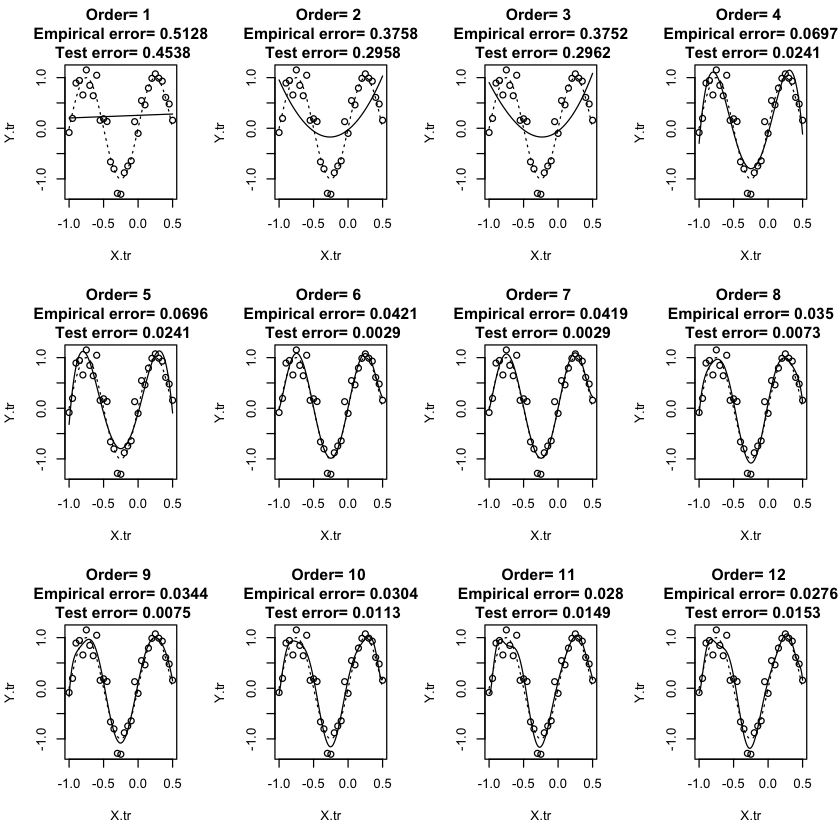

In [4]:
par(mfrow=c(3,4))
for (m in 1:12) {
  ls<-ls.pol(X.tr,Y.tr,m,X.ts)

  #Extract predictions and Remp components
  Y.hat<-ls$pred
  Remp<-ls$Remp
  Rtest<-mean((Y.hat-Y.ts)^2)

  plot(X.tr,Y.tr,main=paste("Order=",m, "\n Empirical error=",round(Remp,digits=4),"\n Test error=",round(Rtest,4)))
  lines(X.ts,Y.ts,lty="dotted")
  lines(X.ts,Y.hat)
}

## Neural networks

The command `nnet` creates a neural network model (non-linear model) for the formula provided as input (parametric identification) by using the input data and then returns the created model. It is necessary to load the package  `nnet`. 


In [5]:
library(nnet)

Once the neural model has been created, it can be used for predicting the output for new input data by employing the function `predict` (see scripts). Type `help(nnet)` in R for more details. The parameters $x$ and $y$ correspond to the inputs and the outputs respectively (from the learning base used for creating the model). The other parameters we use are `size` for the number of units in the hidden layer, `maxit` for the maximal number of iterations and `linout` to specify if a neuron's output function is linear or logistic (regression or classification).

*  Using the function, training and test sets established in the previous section, build neural networks for different sizes of hidden layers $\in[1,12]$ with linear output. 



In [6]:
max.n.par<-12
min.n.par<-1


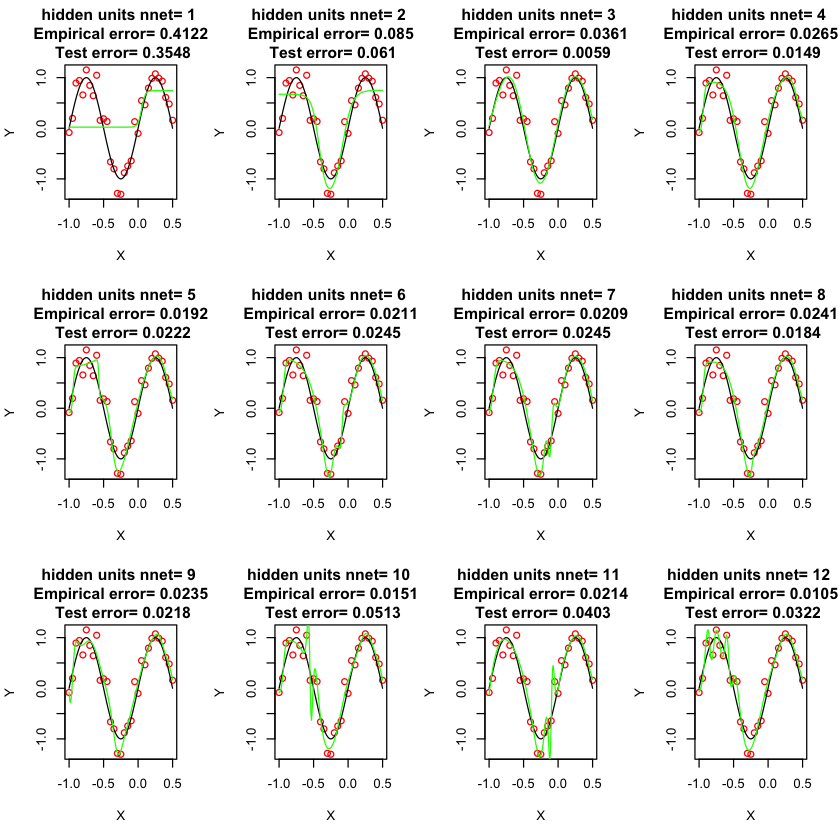

In [7]:
par(mfrow=c(3,4))
for (n.par in min.n.par:max.n.par){
    model<- nnet (X.tr,Y.tr,
                     size=n.par,
                     maxit=1000,
                     trace=FALSE,linout=TRUE)

    #Compute predictions on training and test set    
    Remp<-mean((model$fitted.values-Y.tr)^2)
    Y.hat<- predict(model,array(X.ts,c(length(X.ts),1)))
    Rtest<-mean((Y.hat-Y.ts)^2)
    
    plot(X.tr,Y.tr,
         col="red",
         main=paste("hidden units nnet=",n.par, "\n Empirical error=", round(Remp,digits=4), "\n Test error=", round(Rtest,digits=4)),
         xlab="X",
         ylab="Y")
    lines(X.ts,Y.ts,col="black")
    lines(X.ts,Y.hat,col="green")
   }

*  For how many neurons in the hidden layer do you obtain the best generalization capacity? 
*  Note that the convergence of a neural network depends on the initialization of the network's weights. What happens if the generator's random number seed is changed?


## Cross-validation

The K-fold cross-validation provides the possibility to obtain a MSE estimate which is much more realistic than the empirical error on new test data. It is in particular used for detecting overfitting and to choose a model. The following code uses neural networks with different numbers of hidden nodes to model the dependencies between X and Y.


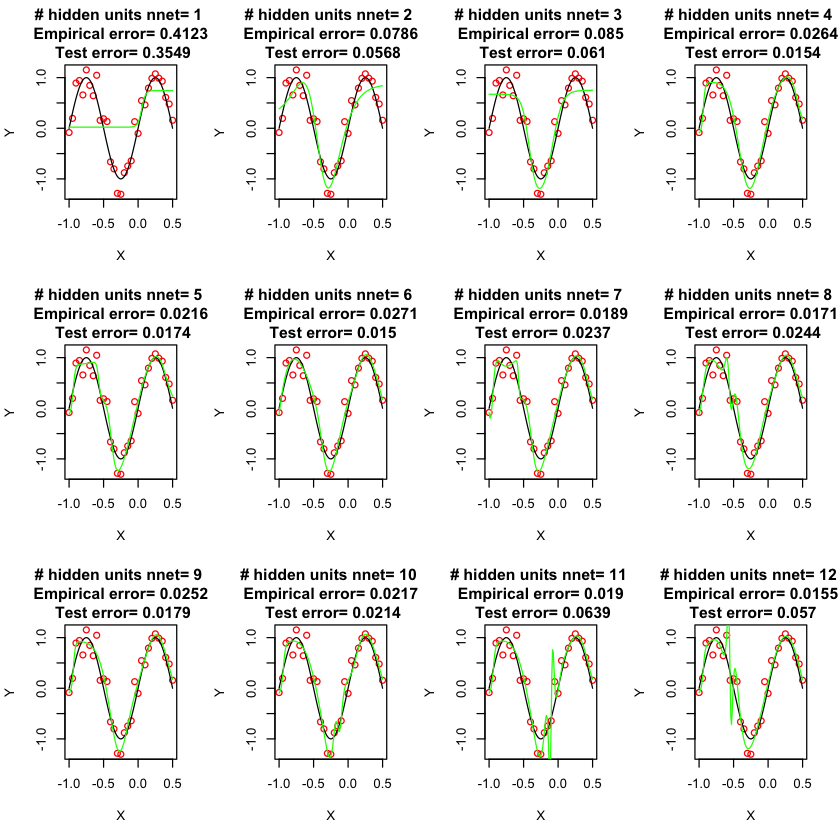

In [8]:
par(mfrow=c(3,4))
for (n.par in min.n.par:max.n.par){
    model<- nnet(X.tr,Y.tr,
                     size=n.par,
                     maxit=1000,
                     trace=FALSE,linout=TRUE)
                     
    Remp=mean((model$fitted.values-Y.tr)^2)
    Y.hat<- predict(model,array(X.ts,c(length(X.ts),1)))
    Rtest<-mean((Y.hat-Y.ts)^2)
    
       plot(X.tr,Y.tr,
         col="red",
         main=paste("# hidden units nnet=",n.par, "\n Empirical error=", round(Remp,digits=4),"\n Test error=",round(Rtest,digits=4) ),
         xlab="X",
         ylab="Y")
    lines(X.ts,Y.ts,col="black")
    lines(X.ts,Y.hat,col="green")
}

## Exercises 

Adapt the previous code to carry out a 10-fold cross validation using the same parameters to fit the neural network. Which model seems to be the best one using cross-validation? Does this match the error obtained on the test set?


In [9]:
for (n.par in min.n.par:max.n.par){    
    index=sample(1:length(X.tr))
    size.CV<-floor(length(X.tr)/10)
    CV.err<-NULL
    for (i in 1:10) {
     i.ts<-(((i-1)*size.CV+1):(i*size.CV))  
     i.tr<-setdiff(index,i.ts)
     X.tr.tr<-X.tr[i.tr]
     Y.tr.tr<-Y.tr[i.tr]  
     X.tr.ts<-X.tr[i.ts]  
     Y.tr.ts<-Y.tr[i.ts]  
 
     model<- nnet (X.tr.tr,Y.tr.tr,
                      size=n.par,
                      maxit=1000,
                      trace=FALSE,linout=TRUE)
     Y.hat.ts<- predict(model,X.tr.ts)
     CV.err<-c(CV.err,mean((Y.hat.ts-Y.tr.ts)^2))
    }
print(paste("CV error=",round(mean(CV.err),digits=4), " ; std dev=",round(sd(CV.err),digits=4) ))
}

[1] "CV error= 0.7836  ; std dev= 0.6066"
[1] "CV error= 0.2305  ; std dev= 0.1384"
[1] "CV error= 0.1361  ; std dev= 0.1468"
[1] "CV error= 0.1992  ; std dev= 0.1968"
[1] "CV error= 0.1959  ; std dev= 0.1553"
[1] "CV error= 0.1858  ; std dev= 0.1768"
[1] "CV error= 0.7252  ; std dev= 1.3859"
[1] "CV error= 6.2647  ; std dev= 13.953"
[1] "CV error= 31.3127  ; std dev= 97.6007"
[1] "CV error= 0.9502  ; std dev= 1.648"
[1] "CV error= 0.4256  ; std dev= 0.3632"
[1] "CV error= 1.328  ; std dev= 2.5927"


## Classification

We will demonstrate the resolution of a classification problem using neural networks. In a classification problem the output variable is discrete and not necessarily ordered (i.e. the type of animal, the shape of a character). If the output variable is binary (for example TRUE/FALSE), the problem can be solved by replacing the two possibilities by $0$ and $1$ and then using a prediction model based on least squares. 

### Exercises

Using the data set `BreastCancer.Rdata` which consists of nine input variables characterizing medical measures for 683 patients. The output variable  is $1$ if the person was healed and $0$ otherwise. 
 

In [10]:
rm(list=ls())
library(nnet)
set.seed(0)

#Load Breast Cancer data set 
load("datasets/BreastCancer.Rdata")

#make it balanced w.r.t. labels
I1<-which(Y==1)
I0<-which(Y==0)
subI0<-sample(I0,length(I1))

X2<-rbind(X[subI0,],X[I1,])
Y2<-c(Y[subI0],Y[I1])

size<-length(Y2)
index<-sample(1:size)

X<-X2[index,]
Y<-Y2[index]

X<-data.frame(X)

#Create a training and a test set
i.tr<-sample(1:size,round(size/3))
i.ts<-setdiff(1:size,i.tr)
X.tr<-X[i.tr,]
Y.tr<-Y[i.tr]
X.ts<-X[i.ts,]
Y.ts<-Y[i.ts]

*  Build a neural network model on the training data of size 10 with a maximum number of iterations 1000 and logistic output. Use this model to predict the outcome of the test data. Compute the mean classification error.


In [11]:
model<- nnet(X.tr,Y.tr,size=10,maxit=1000,trace=FALSE,linout=FALSE)
    
#model<-lm(Y.tr~.,X.tr)
#model<-tree(Y.tr~.,X.tr)
#model<-svm(Y.tr~.,X.tr)
#model<-lazy(Y.tr~.,X.tr)

#compute predictions for the training set
Y.hat.tr<-predict(model,X.tr)
Remp=1-mean(as.numeric(round(Y.hat.tr)==Y.tr))
    
#compute predictions for the test set
Y.hat.ts<- predict(model,X.ts)
Rtest<-1-mean(as.numeric(round(Y.hat.ts)==Y.ts))

In [12]:
print("Estimation of the classification error (in %)")  
print(paste("Training set: ",signif(100*Remp,4),"; test set: ",signif(100*Rtest,4)))


[1] "Estimation of the classification error (in %)"
[1] "Training set:  0.6289 ; test set:  5.643"


*  Perform this analysis in cross-validation.


In [13]:
#Compute the result with a 10-fold cross validation
index=sample(1:length(Y.tr))
size.CV<-floor(length(Y.tr)/10)
CV.err<-NULL
    
for (i in 1:10) {
    i.ts<-(((i-1)*size.CV+1):(i*size.CV))  
    i.tr<-setdiff(index,i.ts)
    X.tr.tr<-X.tr[i.tr,]
    Y.tr.tr<-Y.tr[i.tr]  
    X.tr.ts<-X.tr[i.ts,] 
    Y.tr.ts<-Y.tr[i.ts]
      
    model<- nnet(Y.tr.tr~.,X.tr.tr,size=2,maxit=1000,trace=FALSE,linout=FALSE)
    #model<-lm(Y.tr.tr~.,X.tr.tr)
    #model<-tree(Y.tr.tr~.,X.tr.tr)
    #model<-svm(Y.tr~.,X.tr)
    #model<-lazy(Y.tr~.,X.tr)

    Y.hat.ts<- round(predict(model,X.tr.ts))
    CV.err<-c(CV.err,1-mean(as.numeric(Y.hat.ts==Y.tr.ts)))
}

In [14]:
print("Estimation of the classification error (in %)")  
print(paste("In CV: ",signif(100*mean(CV.err),4)))

[1] "Estimation of the classification error (in %)"
[1] "In CV:  5.333"


*  The specification of a prediction model is often very similar from one package to another. Install the packages `tree`, `lazy` and `e1071` which implement decision tree, nearest neighbor and SVM models. Create the same classification analysis using linear models `lm`, decision trees `tree`, SVM models `svm` and lazy learning `lazy`.